<a href="https://colab.research.google.com/github/ojan9976/kinerja_siswa/blob/main/kinerja_siswa_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import files


In [7]:
# 2. Upload file Excel
uploaded = files.upload()  # Pilih file 'dataset.xlsx'


Saving dataset.xlsx to dataset (1).xlsx


In [8]:
# 3. Baca data dan pilih kolom
df = pd.read_excel("dataset.xlsx", header=4)

kolom_identitas = ['No', 'Nama', 'Kelas']
kolom_nilai = ['TP01', 'TP02', 'TP03', 'TP04', 'TP05', 'TP06', 'TP07', 'TP08']

df = df[kolom_identitas + kolom_nilai].dropna()


In [9]:
# 4. Normalisasi data
scaler = StandardScaler()
nilai_scaled = scaler.fit_transform(df[kolom_nilai])


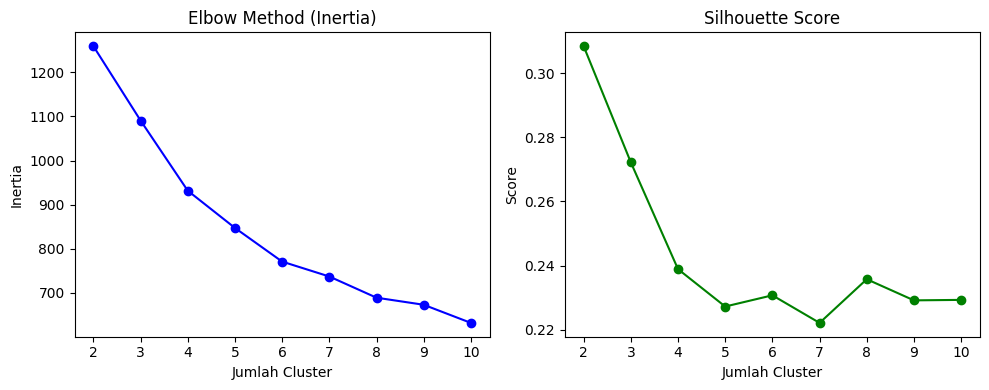

In [10]:
inertias = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(nilai_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(nilai_scaled, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertias, 'bo-')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, 'go-')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Score")
plt.tight_layout()
plt.show()


In [11]:
# Ambil jumlah cluster terbaik berdasarkan silhouette tertinggi
optimal_k = range_clusters[np.argmax(silhouette_scores)]
print(f"Jumlah cluster optimal berdasarkan silhouette: {optimal_k}")

Jumlah cluster optimal berdasarkan silhouette: 2


In [12]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(nilai_scaled)

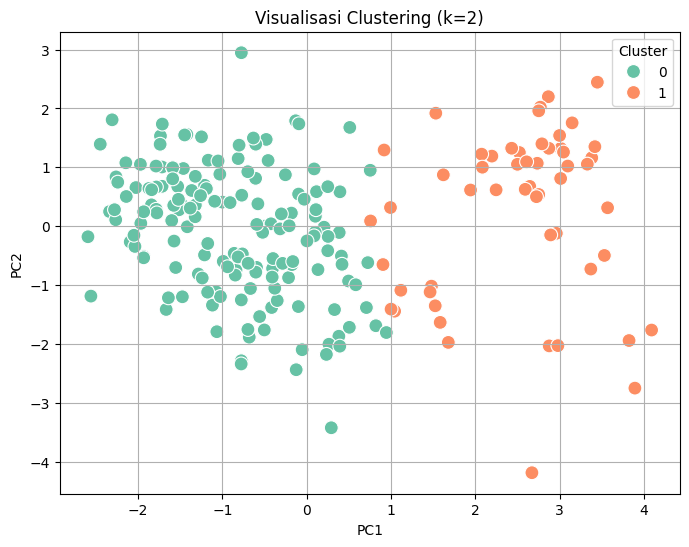

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nilai_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title(f'Visualisasi Clustering (k={optimal_k})')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()
